# Convergencia do Zerinho ou Um

http://mapadobrincar.folha.com.br/brincadeiras/formulas-de-escolha/338-zero-ou-um

Todos os participantes dizem "zero ou um" e colocam as mãos para a frente, mostrando um dedo ou nenhum.

Se alguém colocar sozinho o um ou o zero, sai da brincadeira.

O resto continua, até ficarem só dois participantes, que decidem a brincadeira no par ou ímpar.

Pergunta: a medida que voce fica popular e conquista amigos, 
quantas jogadas sao necessarias para convergir o zerinho ou um (ou zezinho soltou um pum em algumas rodas de poucos amigos)

In [1]:
%matplotlib inline
import time
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from multiprocessing import Pool

In [2]:
# guardar informacao de convergencia para cada grupo de amigos
converge_galera = {}
media_galera = {}
desvio_galera = {}
min_galera = {}
max_galera = {}
numero_interacoes = 50

# uma função que testa convergencia para cada grupo de amigos
def jogo(amigos):
    for interacao in xrange(numero_interacoes):
        i = 0
        while True:
            # jogadas de zerinho ou um
            zero_um = np.random.randint(0, 2, size=amigos)
            #print i, zero_um
            i += 1
            # uma maneira de testar quem sai
            if sum(zero_um) == 1 or sum(zero_um) == amigos-1:
                #print i,'converge'
                if converge_galera.has_key(amigos):
                    converge_galera[amigos].append(i)
                else:
                    converge_galera[amigos] = [i]
                break
    media_galera[amigos] = int(np.mean(converge_galera[amigos]))
    desvio_galera[amigos] = int(np.std(converge_galera[amigos]))
    min_galera[amigos] = int(np.min(converge_galera[amigos]))
    max_galera[amigos] = int(np.max(converge_galera[amigos]))
    return 

In [3]:
if __name__ == "__main__":
    start = time.time()
    map(jogo, [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
    print "Serial time: %f" % (time.time() - start)


    start = time.time()
    pool = Pool(processes=4)
    pool.map(jogo, [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
    print "Parallel time: %f" % (time.time() - start)

Serial time: 1.010347
Parallel time: 0.591333


In [4]:
dados = {'media' : media_galera,'desvio':desvio_galera,
         'minimo':min_galera,'maximo':max_galera}
tabela = pd.DataFrame(dados,columns=['minimo','media','maximo','desvio'])
print tabela

    minimo  media  maximo  desvio
3        1      1       4       0
4        1      1       5       1
5        1      3      12       2
6        1      3      10       2
7        1      9      40       8
8        1     16      53      12
9        1     30     159      29
10       2     54     218      50
11       3     93     323      80
12       2    142     692     142
13      13    290    1160     262
14      16    576    2332     535
15      10   1039    4718    1011


In [5]:
tabela.head()

,minimo,media,maximo,desvio
3,1,1,4,0
4,1,1,5,1
5,1,3,12,2
6,1,3,10,2
7,1,9,40,8


In [6]:
print "A soma de interacoes medias: %f" %np.sum(media_galera.values())
print "A soma de interacoes minimas: %f" %np.sum(min_galera.values())
print "A soma de interacoes minimas: %f" %np.sum(max_galera.values())

A soma de interacoes medias: 2257.000000
A soma de interacoes minimas: 53.000000
A soma de interacoes minimas: 9726.000000


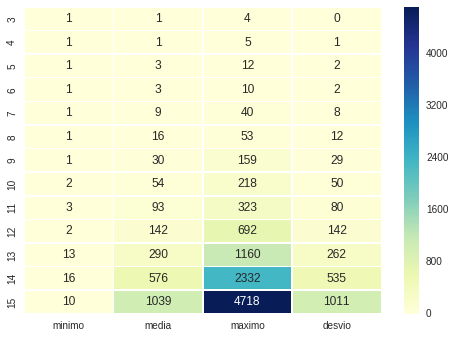

In [7]:
sns.set()
# Draw a heatmap with the numeric values in each cell
sns.heatmap(tabela, annot=True, fmt="d", linewidths=.5,cmap="YlGnBu")

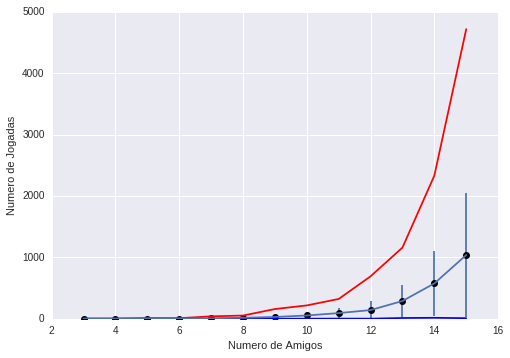

In [8]:
plt.plot(media_galera.keys(),media_galera.values(),'ko')
plt.plot(min_galera.keys(),min_galera.values(),'b-')
plt.plot(max_galera.keys(),max_galera.values(),'r-')
plt.errorbar(media_galera.keys(),media_galera.values(), yerr=desvio_galera.values())

plt.xlabel('Numero de Amigos')
plt.ylabel('Numero de Jogadas')

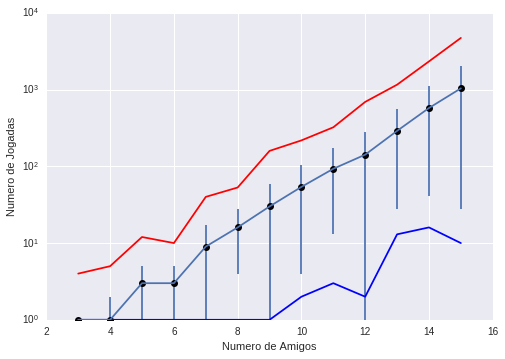

In [9]:
plt.plot(media_galera.keys(),media_galera.values(),'ko')
plt.plot(min_galera.keys(),min_galera.values(),'b-')
plt.plot(max_galera.keys(),max_galera.values(),'r-')

plt.yscale('log')
plt.errorbar(media_galera.keys(),media_galera.values(), yerr=desvio_galera.values())
plt.xlabel('Numero de Amigos')
plt.ylabel('Numero de Jogadas')



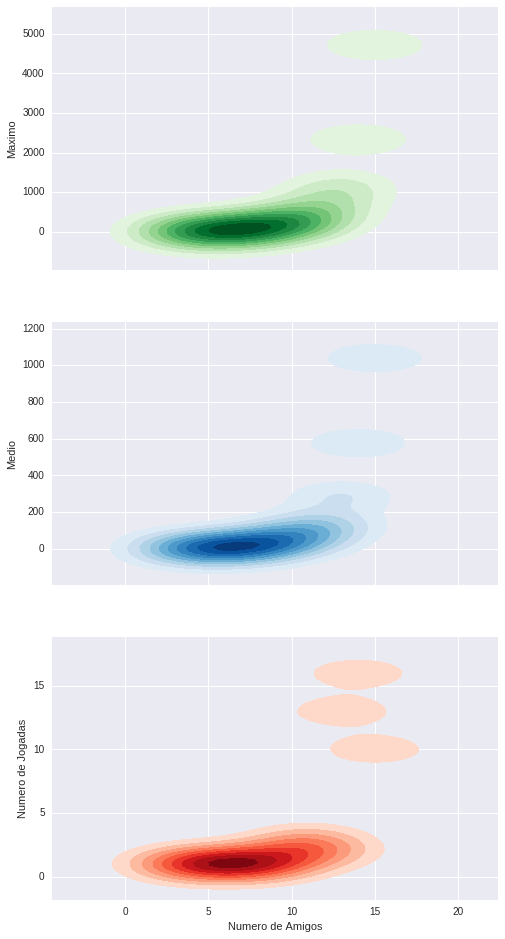

In [10]:
# Set up the matplotlib figure
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 16), sharex=True)
sns.set(style="darkgrid")

x1 = np.array(max_galera.keys())
y1 = np.array(max_galera.values())
sns.kdeplot(x1,y1, cmap="Greens", shade=True, shade_lowest=False,ax=ax1)
ax1.set_ylabel("Maximo")

x2 = np.array(media_galera.keys())
y2 = np.array(media_galera.values())
sns.kdeplot(x2,y2, cmap="Blues", shade=True, shade_lowest=False,ax=ax2)
ax2.set_ylabel("Medio")

x3 = np.array(min_galera.keys())
y3 = np.array(min_galera.values())
sns.kdeplot(x3,y3, cmap="Reds", shade=True, shade_lowest=False,ax=ax3)
ax3.set_ylabel("Minimo")

plt.xlabel('Numero de Amigos')
plt.ylabel('Numero de Jogadas')

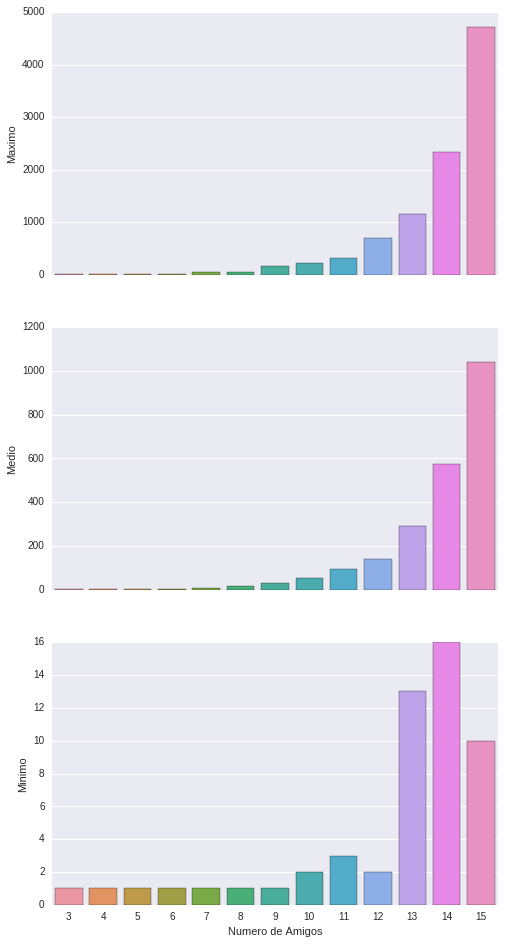

In [11]:
# Set up the matplotlib figure
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 16), sharex=True)
sns.set(style="darkgrid")


x1 = max_galera.keys()
y1 = max_galera.values()
sns.barplot(x1, y1, ax=ax1)
ax1.set_ylabel("Maximo")


x2 = media_galera.keys()
y2 = media_galera.values()
sns.barplot(x2, y2, ax=ax2)
ax2.set_ylabel("Medio")


x3 = min_galera.keys()
y3 = min_galera.values()
sns.barplot(x3, y3, ax=ax3)
ax3.set_ylabel("Minimo")

plt.xlabel('Numero de Amigos')

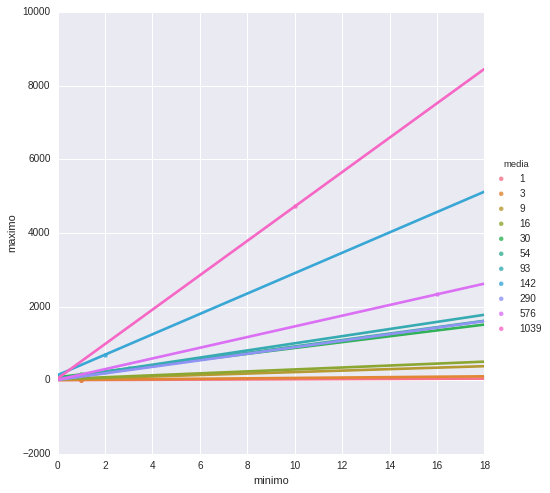

In [12]:
sns.set(style="darkgrid")
g = sns.lmplot(x="minimo", y="maximo", hue="media",data=tabela, size=7)

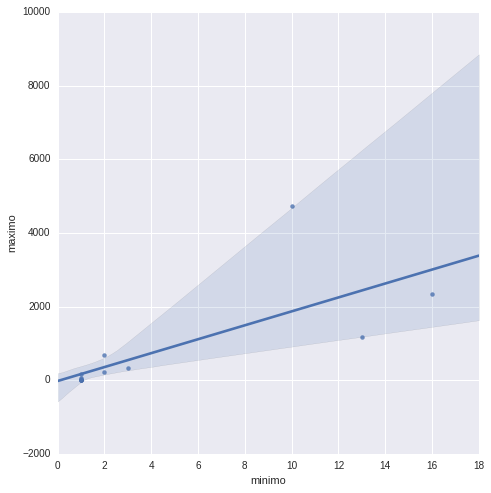

In [13]:
sns.set(style="darkgrid")
g = sns.lmplot(x="minimo", y="maximo", data=tabela, size=7)